In [1]:
import pandas
import seaborn as sns
from runco import config, sc
import datetime
import matplotlib.pyplot as plt
import numpy

sns.set_context('talk')
sns.set_style('whitegrid')
%matplotlib notebook

In [2]:
df = pandas.read_csv("/home/kwierman/Downloads/daily_pot.csv")
df.dropna()

,Day,POT,POT_on_tape
0,2015-10-12,0.000000e+00,1.173864e+14
1,2015-10-13,0.000000e+00,2.185634e+14
2,2015-10-14,0.000000e+00,3.147724e+14
3,2015-10-15,4.390000e+16,4.314000e+16
4,2015-10-16,1.640000e+17,1.604000e+17
5,2015-10-17,1.302000e+17,1.254000e+17
6,2015-10-18,9.547000e+16,9.348000e+16
7,2015-10-19,3.383000e+17,3.264000e+17
8,2015-10-20,3.529000e+17,3.494000e+17
9,2015-10-21,8.969000e+17,8.906000e+17


In [3]:
df.loc[(df['Day'] < '2017-03-01') & (df['Day'] > '2017-02-01'), ' POT_on_tape'] = 0.0
df.loc[(df['Day'] > '2017-05-02') & (df['Day'] < '2017-05-20'), ' POT_on_tape'] = 0.0

['Day', ' POT ', ' POT_on_tape']


<IPython.core.display.Javascript object>


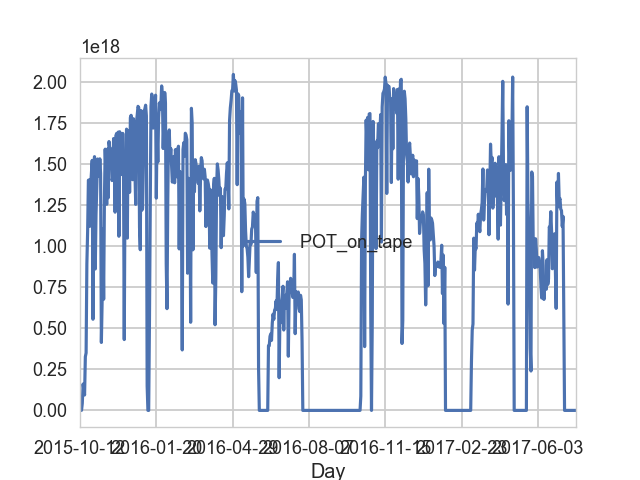

In [4]:
print list(df.columns.values)
df.plot('Day',' POT_on_tape')

In [5]:
df['POT_on_tape_acc']=df[' POT_on_tape'].cumsum()
df['POT_acc']=df[' POT '].cumsum()

<IPython.core.display.Javascript object>


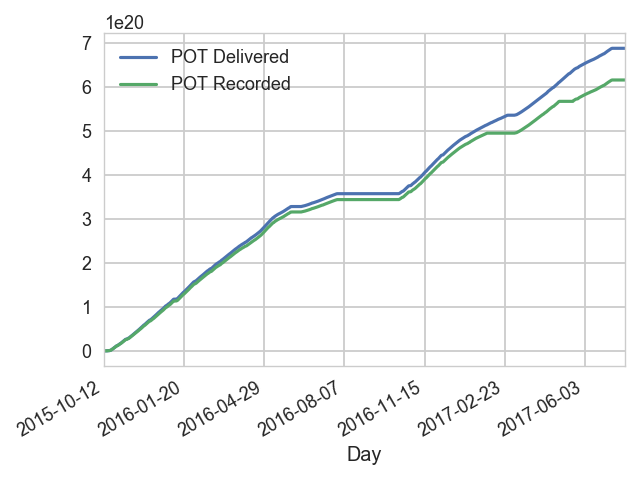

In [6]:
fig = plt.figure()
ax = plt.subplot()
df.plot(x='Day',y='POT_acc', ax=ax)
df.plot(x='Day',y='POT_on_tape_acc', ax=ax)
fig.autofmt_xdate()
ax.legend(["POT Delivered", "POT Recorded"])
plt.tight_layout()
plt.savefig("pot.svg")

In [7]:
df['POT_eff']=df[' POT_on_tape']/df[' POT ']

<IPython.core.display.Javascript object>


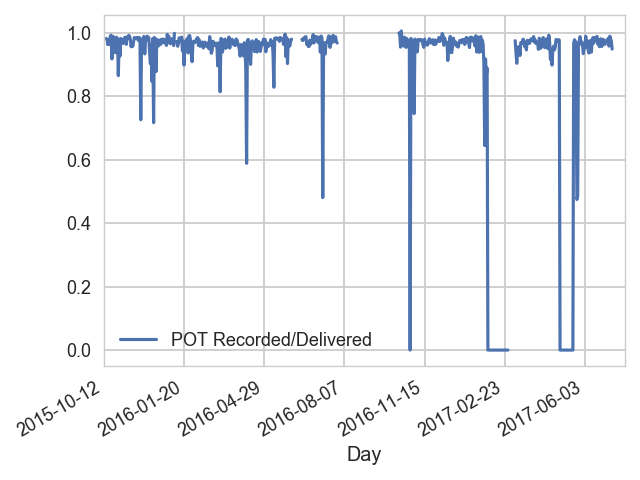

In [8]:
fig = plt.figure()
ax = plt.subplot()
df.plot(x='Day',y='POT_eff', ax=ax)
fig.autofmt_xdate()
ax.legend(["POT Recorded/Delivered", "POT Recorded"])
plt.tight_layout()
plt.savefig("pot_eff.svg")

<IPython.core.display.Javascript object>


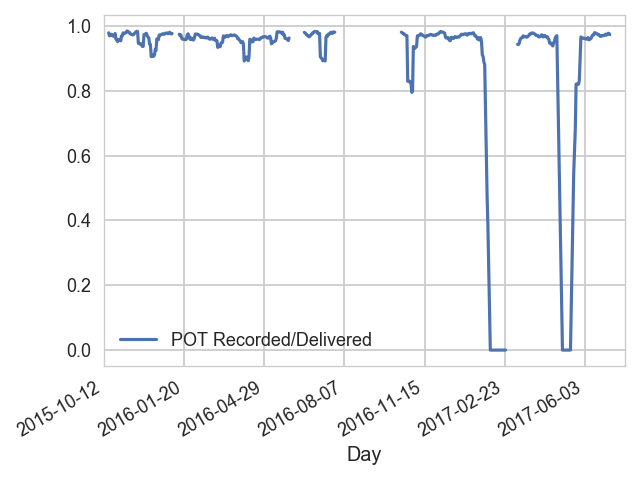

In [10]:
fig = plt.figure()
ax = plt.subplot()
df['POT_eff_3pt'] = df['POT_eff'].rolling(7, center=True).mean()
df.plot(x='Day',y='POT_eff_3pt', ax=ax)
fig.autofmt_xdate()
ax.legend(["POT Recorded/Delivered", "POT Recorded"])
plt.tight_layout()